### Notebook to format improved cell compartments and annotations of final object for production

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Created on**: 230811
- **Last modified**: 240507

### Import required modules

In [1]:
import anndata
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                 10.0.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.1.2
executing           1.2.0
h5py                3.9.0
importlib_resources NA
ipykernel           6.25.0
ipywidgets          8.0.7
jedi                0.18.2
joblib              1.3.2
kiwisolver          1.4.4
legacy_api_wrap     NA
llvmlite            0.40.1
matplotlib          3.7.2
mpl_toolkits        NA
natsort             8.4.0
numba               0.57.1
numpy               1.24.4
packaging           23.1
pandas              2.0.3
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.9.1
prompt_toolkit      3.0.39
psutil              5.9.5
ptyprocess          0.7.0

In [3]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis = 0).astype(int), adata.X.sum(axis = 0))

### Read in individual cell compartment objects

In [4]:
epi_copd_all = sc.read_h5ad('../data/Marburg_cell_states_scANVI_ctl240504.raw.h5ad')
epi_copd_all

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_states', 'cell_compartment'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Normalise cell states labels

In [5]:
adata = epi_copd_all.copy()
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_states', 'cell_compartment'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [6]:
adata.obs['cell_states'] = adata.obs['cell_states'].astype('category')
adata.obs['cell_states'].cat.categories

Index(['APOD+Ciliated', 'CCDC3+Basal1', 'DHRS9+Club', 'FB-like_Basal',
       'IGFBP6+Basal', 'IGFBP+Basal', 'ImmuneClub', 'Ionocyte',
       'KRT14+AQP1+Secretory', 'KRT14+Goblet', 'KRT16+SupraB', 'KRT17+Goblet',
       'MHCII+Club', 'MKI67+pBasal', 'MUC5B+Goblet', 'NOTCH3+SupraB',
       'NOTCH+Basal2', 'OASiav_Ciliated', 'OMG+Ciliated', 'RARRES1+lip_Goblet',
       'S100A2+Basal', 'SCGB1+KRT5-FOXA1+iav_Club', 'SCGB1A1+Deutero',
       'SCGB1A1+Goblet', 'SERPINE2+Basal', 'TCN1+Club', 'TNC+Basal',
       'iav-lip_Club', 'iavAPC_Epi', 'iav_Goblet', 'ifn_Basal', 'ifn_Goblet',
       'mixed_Goblet1', 'mixed_Goblet2', 'p53_Ciliated'],
      dtype='object')

### Create a column for cell-compartment

In [7]:
trans_from = [['APOD+Ciliated', 'OASiav_Ciliated', 'OMG+Ciliated', 'p53_Ciliated'],
['CCDC3+Basal1', 'FB-like_Basal', 'IGFBP6+Basal', 'IGFBP+Basal', 'MKI67+pBasal', 'NOTCH+Basal2', 'S100A2+Basal', 'SERPINE2+Basal', 'TNC+Basal', 'ifn_Basal'],
['DHRS9+Club', 'ImmuneClub', 'MHCII+Club', 'SCGB1+KRT5-FOXA1+iav_Club', 'TCN1+Club', 'iav-lip_Club'], 
['KRT14+Goblet', 'KRT17+Goblet', 'MUC5B+Goblet', 'RARRES1+lip_Goblet', 'SCGB1A1+Goblet', 'iav_Goblet', 'ifn_Goblet'],
['KRT16+SupraB', 'NOTCH3+SupraB'],
['Ionocyte'],
['iavAPC_Epi'],
['SCGB1A1+Deutero'],
['KRT14+AQP1+Secretory'],
['mixed_Goblet1', 'mixed_Goblet2']]

trans_to = ['Ciliated', 'Basal', 'Club', 'Goblet', 'SupraB', 'Ionocyte', 'Epi', 'Deuterosomal', 'Secretory', 'Mixed']

adata.obs['cell_compartment'] = [str(i) for i in adata.obs['cell_states']]
for leiden,celltype in zip(trans_from, trans_to):
    for leiden_from in leiden:
        adata.obs['cell_compartment'][adata.obs['cell_compartment'] == leiden_from] = celltype

/var/folders/j1/l8rz6t7953z7vlpdytk0pbv40000gn/T/ipykernel_75291/2882603228.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['cell_compartment'][adata.obs['cell_compartment'] == leiden_from] = celltype
/var/folders/j1/l8rz6t7953z7vlpdytk0pbv40000gn/T/ipykernel_75291/2882603228.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['cell_compartment'][adata.obs['cell_compartment'] == leiden_from] = celltype
/var/folders/j1/l8rz6t7953z7vlpdytk0pbv40000gn/T/ipykernel_75291/2882603228.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [8]:
adata.obs['cell_compartment'] = adata.obs['cell_compartment'].astype('category')
adata.obs['cell_compartment'].cat.categories

Index(['Basal', 'Ciliated', 'Club', 'Deuterosomal', 'Epi', 'Goblet',
       'Ionocyte', 'Mixed', 'Secretory', 'SupraB'],
      dtype='object')

### Export object

In [9]:
X_is_raw(adata)

True

In [10]:
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_states', 'cell_compartment'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Visualise manifold with cell states and cell compartments

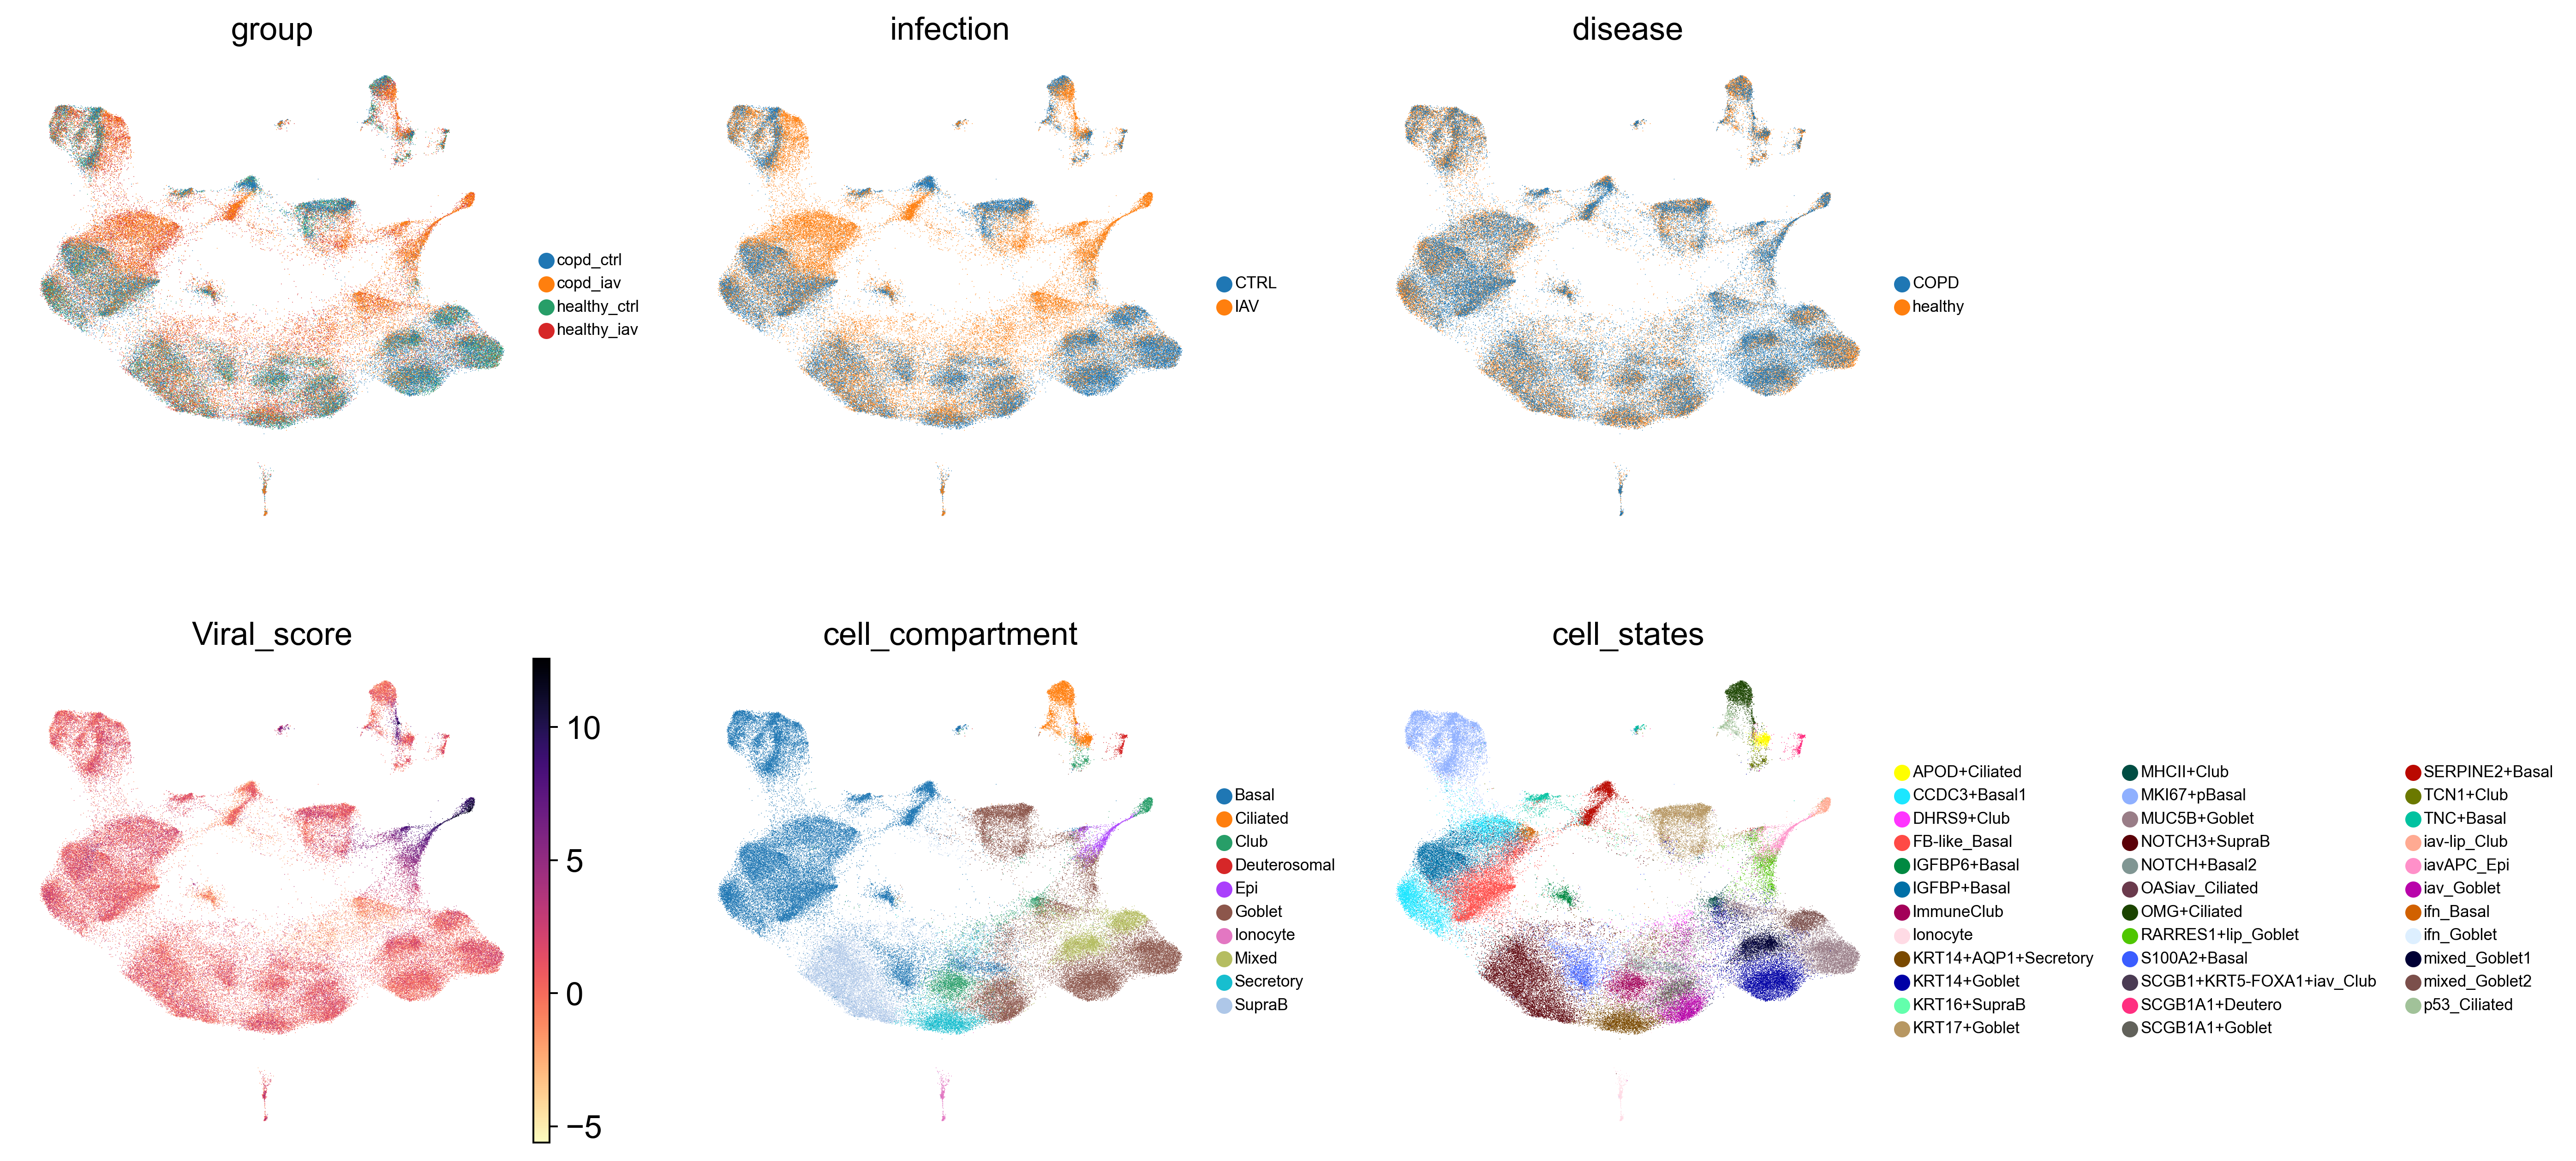

In [12]:
sc.pl.umap(adata,
           color = ['group', 'infection', 'disease', 'Viral_score', 'cell_compartment', 'cell_states'],
           size = 0.4,
           frameon = False,
           legend_fontsize = 7,
           ncols = 3)

In [13]:
adata.write('../data/Marburg_cell_states_locked_ctl240504.raw.h5ad')